In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#pip install gdown

In [ ]:
#gdown.__version__

In [ ]:
#!cp '/content/drive/MyDrive/cat_dog_dataset.zip' '/content1'

In [ ]:
!unzip /content/drive/MyDrive/cat_dog_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/cat_dog_dataset/cat/cat.1018.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1817.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2224.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4839.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4055.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4851.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2483.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4127.jpg  
  inflating: content/cat_dog_dataset/cat/cat.3377.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4770.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1310.jpg  
  inflating: content/cat_dog_dataset/cat/cat.508.jpg  
  inflating: content/cat_dog_dataset/cat/cat.283.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1209.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1312.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2362.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4333.jpg  

In [ ]:
#import os
#os.listdir('/content/content/cat_dog_dataset')

In [ ]:
#len(os.listdir('/content/content/cat_dog_dataset/cat'))

In [ ]:
#len(os.listdir('/content/content/cat_dog_dataset/dog'))

In [ ]:
import tensorflow as tf
#training data functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model building functions
from tensorflow.keras.models import Sequential #forwardpropagational model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense #Dense use to create input&output&hiddenlayer

In [ ]:
dataset_path='/content/content/cat_dog_dataset'

In [ ]:
#hyperparameters can be changed
batch_size=32
epochs=10 #no of iterations
image_size=[150,150]

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
training_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2000 images belonging to 2 classes.


In [ ]:
image_size[0]

150

In [ ]:
#(x,y,c)

In [ ]:
#model architecure building
model=Sequential()
#conolutional layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
#pooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#fully connected layer
model.add(Flatten())
#22500 pixels/units
 #hidden layer
model.add(Dense(128,activation='relu'))
 #output layer
model.add(Dense(1,activation='sigmoid'))


In [ ]:
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples/batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/batch_size,
    epochs=epochs

)

Epoch 1/10
250/250 [==============================] - 24s 74ms/step - loss: 1.0785 - accuracy: 0.5987 - val_loss: 0.6078 - val_accuracy: 0.6595
Epoch 2/10
250/250 [==============================] - 17s 70ms/step - loss: 0.5264 - accuracy: 0.7449 - val_loss: 0.6114 - val_accuracy: 0.6700
Epoch 3/10
250/250 [==============================] - 18s 74ms/step - loss: 0.3716 - accuracy: 0.8370 - val_loss: 0.6238 - val_accuracy: 0.6820
Epoch 4/10
250/250 [==============================] - 20s 79ms/step - loss: 0.2275 - accuracy: 0.9165 - val_loss: 0.7067 - val_accuracy: 0.6845
Epoch 5/10
250/250 [==============================] - 17s 70ms/step - loss: 0.1283 - accuracy: 0.9591 - val_loss: 0.8386 - val_accuracy: 0.6830
Epoch 6/10
250/250 [==============================] - 17s 70ms/step - loss: 0.0628 - accuracy: 0.9849 - val_loss: 1.0237 - val_accuracy: 0.6845
Epoch 7/10
250/250 [==============================] - 18s 71ms/step - loss: 0.0357 - accuracy: 0.9940 - val_loss: 1.0382 - val_accuracy:

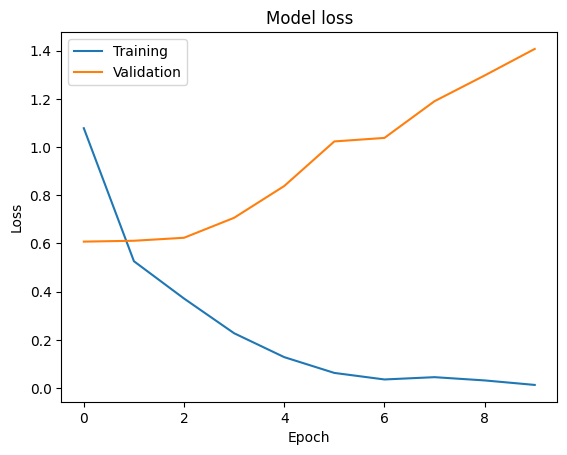

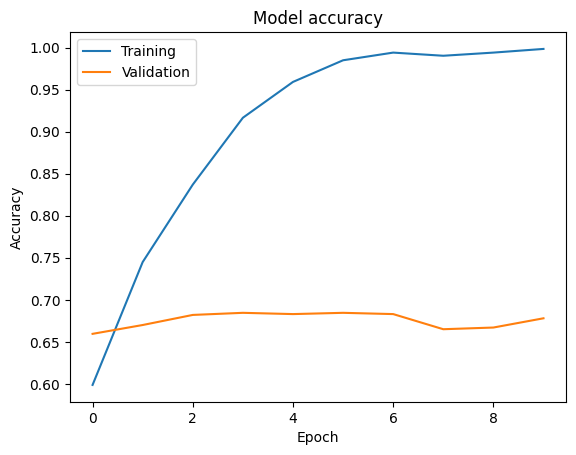

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='upper left')
plt.show()

In [ ]:
#model architecure building
model1=Sequential()
#conolutional layer
model1.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
model1.add(Conv2D(128,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
#pooling layers
model1.add(MaxPooling2D(pool_size=(2,2)))
#fully connected layer
model1.add(Flatten())
#22500 pixels/units
 #hidden layer
model1.add(Dense(128,activation='relu'))
 #output layer
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_1 = model1.fit(
    training_generator,
    steps_per_epoch=training_generator.samples/batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/batch_size,
    epochs=epochs

)

Epoch 1/10
250/250 [==============================] - 38s 129ms/step - loss: 0.7817 - accuracy: 0.5889 - val_loss: 0.6173 - val_accuracy: 0.6545
Epoch 2/10
250/250 [==============================] - 31s 122ms/step - loss: 0.6261 - accuracy: 0.6690 - val_loss: 0.6228 - val_accuracy: 0.6680
Epoch 3/10
250/250 [==============================] - 31s 124ms/step - loss: 0.4673 - accuracy: 0.7846 - val_loss: 0.6245 - val_accuracy: 0.6870
Epoch 4/10
250/250 [==============================] - 31s 123ms/step - loss: 0.2259 - accuracy: 0.9115 - val_loss: 0.7858 - val_accuracy: 0.6995
Epoch 5/10
250/250 [==============================] - 33s 130ms/step - loss: 0.0626 - accuracy: 0.9775 - val_loss: 1.0660 - val_accuracy: 0.7015
Epoch 6/10
250/250 [==============================] - 31s 123ms/step - loss: 0.0211 - accuracy: 0.9966 - val_loss: 1.2809 - val_accuracy: 0.6825
Epoch 7/10
250/250 [==============================] - 31s 123ms/step - loss: 0.0322 - accuracy: 0.9951 - val_loss: 1.5188 - val_ac

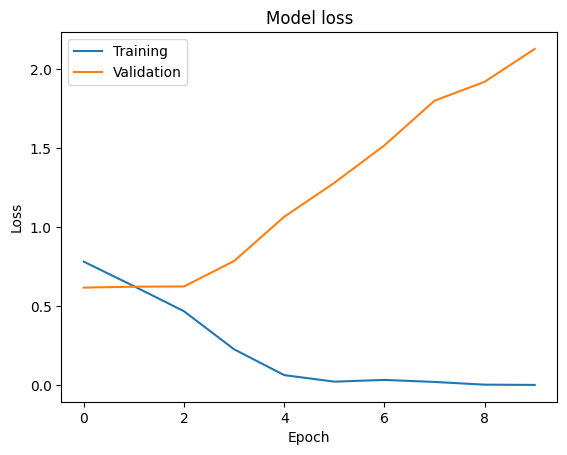

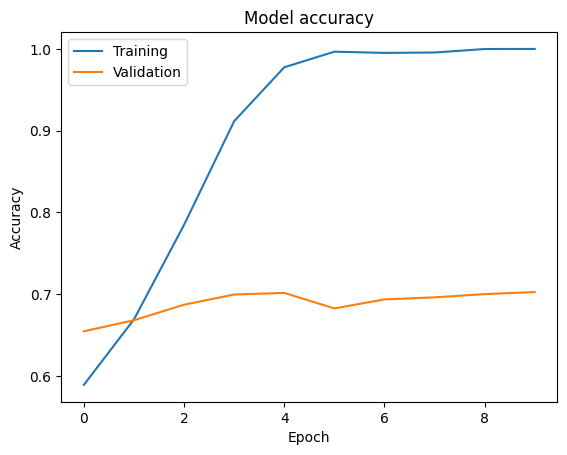

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='upper left')
plt.show()

In [ ]:
model.save('cat_dog_detection.h5')        #h5 : cnn and rnn save format, #pickel : binary format save

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#prediction
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
def predict_image(image_path):
  img=image.load_img(image_path,target_size=image_size)  #load image
  img=image.img_to_array(img)   #converting to array
  img=np.expand_dims(img,axis=0) #expanding dimensionns to match with model
  img/=255.0  #normalize image pixels


  result=model.predict(img)

  return "cat" if result<0.5 else "dog"


In [ ]:
imgg='/content/content/cat_dog_dataset/cat/cat.100.jpg'
predict=predict_image(imgg)
print(predict)

1/1 [==============================] - 0s 19ms/step
cat


In [ ]:
img1='/content/dog.jpeg'
predict=predict_image(img1)
print(predict)

1/1 [==============================] - 0s 18ms/step
dog


In [ ]:
#testing